## Template - Random Forest
Dataset - UCI mushroom classification dataset (https://www.kaggle.com/uciml/mushroom-classification)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option("display.max_columns", 200)

In [3]:
!cd

C:\Users\Starl\Documents\William Project\Machine Learning


## Load Data

In [4]:
data_file = "Datasets/mushrooms.csv"

In [6]:
df = pd.read_csv(data_file)

In [7]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [10]:
df.shape

(8124, 23)

In [9]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


## Data Explore

In [11]:
for col in df.columns:
    print(df[col].value_counts(normalize=True, dropna=False))
    print()

e    0.517971
p    0.482029
Name: class, dtype: float64

x    0.450025
f    0.387986
k    0.101920
b    0.055638
s    0.003939
c    0.000492
Name: cap-shape, dtype: float64

y    0.399311
s    0.314623
f    0.285574
g    0.000492
Name: cap-surface, dtype: float64

n    0.281142
g    0.226489
e    0.184638
y    0.131955
w    0.128016
b    0.020679
p    0.017725
c    0.005416
u    0.001969
r    0.001969
Name: cap-color, dtype: float64

f    0.584441
t    0.415559
Name: bruises, dtype: float64

n    0.434269
f    0.265879
y    0.070901
s    0.070901
a    0.049237
l    0.049237
p    0.031512
c    0.023634
m    0.004431
Name: odor, dtype: float64

f    0.974151
a    0.025849
Name: gill-attachment, dtype: float64

c    0.838503
w    0.161497
Name: gill-spacing, dtype: float64

b    0.690793
n    0.309207
Name: gill-size, dtype: float64

b    0.212703
p    0.183653
w    0.147957
n    0.129000
g    0.092565
h    0.090103
u    0.060561
k    0.050222
e    0.011817
y    0.010586
o    0.007878
r  

## Data Clean

## Data Preprocessing & Feature Engineering

In [15]:
from sklearn.preprocessing import LabelEncoder

In [17]:
encoded_df = df.copy()
encoder_dic = {}
for col in df.columns:
    encoder = LabelEncoder()
    encoded_df[col] = encoder.fit_transform(df[col])
    encoder_dic[col] = encoder

In [19]:
encoded_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


## Model Training

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss, classification_report 

In [22]:
X = encoded_df.iloc[:, 1:]
y = encoded_df.iloc[:, 0]
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=5)

In [23]:
cls = RandomForestClassifier(n_estimators=100, min_samples_leaf=5)

In [24]:
cls.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=5)

In [25]:
predictions = cls.predict(X_validation)

In [28]:
print("Accuracy Score: ", accuracy_score(y_validation, predictions))
print("Log Loss Score: ", log_loss(y_validation, predictions))

Accuracy Score:  1.0
Log Loss Score:  9.992007221626415e-16


In [51]:
encoder_dic['class'].inverse_transform([0, 1])

array(['e', 'p'], dtype=object)

In [53]:
print(classification_report(y_validation, predictions, target_names=['e', 'p']))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1232
           p       1.00      1.00      1.00      1206

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



## Feature Importance

In [39]:
feature_importance_df = pd.DataFrame({"Feature Name": df.iloc[:, 1:].columns, "Feature Importance": cls.feature_importances_}).sort_values('Feature Importance', ascending=False)

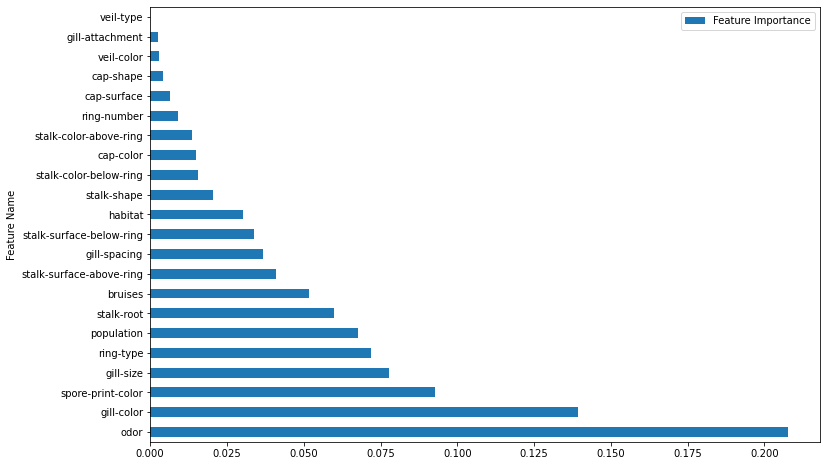

In [44]:
feature_importance_df.set_index("Feature Name").plot.barh(figsize=(12, 8))
plt.show()